In [5]:
# No longer used.  IC cases are now directly input into the notebook.
import xml.etree.ElementTree as ET

def LoadIc(icFile):
    icAll = []
    root = ET.parse(icFile).getroot()
    print(root.tag)
    caseNum = 0
    for icCase in root:
        ic = {}
        print("-----------------------")
        print("case: ", caseNum, icCase.tag, icCase.attrib)
        caseNum += 1
        for data in icCase:
            units = data.get('units')
            print("  ", data.get('name'), data.text, data.get('units'))
            value = float(data.text)
            #if units == "deg" or units == "deg_s":
            #    value = math.radians(value)
            ic[data.get('name')] = value
            #ic[data.get('name')] = gvConvert.ToSI(value, data.get('units'))
        icAll.append(ic)
    return icAll

In [6]:
icList = LoadIc('models/cannonballNoAero/cannonballNoAero.ic')
print("====================")
print(icList)
gvInitialCondition = icList[0]
print("====================")
print(gvInitialCondition)

initialConditions
-----------------------
case:  0 ic {'name': 'Fire 300 m/s'}
   grossWeight 245.0 N
   bodyXXMomentOfInertia 0.1 kgm2
   bodyYYMomentOfInertia 0.1 kgm2
   bodyZZMomentOfInertia 0.1 kgm2
   bodyXYMomentOfInertia 0.0 kgm2
   bodyXZMomentOfInertia 0.0 kgm2
   bodyYZMomentOfInertia 0.0 kgm2
   latitude 0 rad
   longitude 0 rad
   altitude 10.0 m
   referenceWingArea 0.031415 m2
   trueAirspeed 424.264 m_s
   angleOfAttack -45.0 deg
   angleOfSideslip 0.0 deg
   rollEulerAngle 0.0 deg
   pitchEulerAngle 0.0 deg
   yawEulerAngle 0.0 deg
   rollBodyRate 0.0 rad_s
   pitchBodyRate 0.0 rad_s
   yawBodyRate 0.0 rad_s
   XBodyPositionOfCG 0.25 nd
-----------------------
case:  1 ic {'name': 'Spin'}
   grossWeight 245.0 N
   bodyXXMomentOfInertia 0.1 kgm2
   bodyYYMomentOfInertia 0.1 kgm2
   bodyZZMomentOfInertia 0.1 kgm2
   bodyXYMomentOfInertia 0.0 kgm2
   bodyXZMomentOfInertia 0.0 kgm2
   bodyYZMomentOfInertia 0.0 kgm2
   latitude 37.26765 deg
   longitude -76.753906 deg
   al

### Frechet Distance

Frechet distance is a measure of simularity of two curves.  The reference is [here](https://pypi.org/project/frechetdist/)

In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np

__all__ = ['frdist']


def _c(ca, i, j, p, q):

    if ca[i, j] > -1:
        return ca[i, j]
    elif i == 0 and j == 0:
        ca[i, j] = np.linalg.norm(p[i]-q[j])
    elif i > 0 and j == 0:
        ca[i, j] = max(_c(ca, i-1, 0, p, q), np.linalg.norm(p[i]-q[j]))
    elif i == 0 and j > 0:
        ca[i, j] = max(_c(ca, 0, j-1, p, q), np.linalg.norm(p[i]-q[j]))
    elif i > 0 and j > 0:
        ca[i, j] = max(
            min(
                _c(ca, i-1, j, p, q),
                _c(ca, i-1, j-1, p, q),
                _c(ca, i, j-1, p, q)
            ),
            np.linalg.norm(p[i]-q[j])
            )
    else:
        ca[i, j] = float('inf')

    return ca[i, j]


def frdist(p, q):
    """
    Computes the discrete Fréchet distance between
    two curves. The Fréchet distance between two curves in a
    metric space is a measure of the similarity between the curves.
    The discrete Fréchet distance may be used for approximately computing
    the Fréchet distance between two arbitrary curves,
    as an alternative to using the exact Fréchet distance between a polygonal
    approximation of the curves or an approximation of this value.
    This is a Python 3.* implementation of the algorithm produced
    in Eiter, T. and Mannila, H., 1994. Computing discrete Fréchet distance.
    Tech. Report CD-TR 94/64, Information Systems Department, Technical
    University of Vienna.
    http://www.kr.tuwien.ac.at/staff/eiter/et-archive/cdtr9464.pdf
    Function dF(P, Q): real;
        input: polygonal curves P = (u1, . . . , up) and Q = (v1, . . . , vq).
        return: δdF (P, Q)
        ca : array [1..p, 1..q] of real;
        function c(i, j): real;
            begin
                if ca(i, j) > −1 then return ca(i, j)
                elsif i = 1 and j = 1 then ca(i, j) := d(u1, v1)
                elsif i > 1 and j = 1 then ca(i, j) := max{ c(i − 1, 1), d(ui, v1) }
                elsif i = 1 and j > 1 then ca(i, j) := max{ c(1, j − 1), d(u1, vj) }
                elsif i > 1 and j > 1 then ca(i, j) :=
                max{ min(c(i − 1, j), c(i − 1, j − 1), c(i, j − 1)), d(ui, vj ) }
                else ca(i, j) = ∞
                return ca(i, j);
            end; /* function c */
        begin
            for i = 1 to p do for j = 1 to q do ca(i, j) := −1.0;
            return c(p, q);
        end.
    Parameters
    ----------
    P : Input curve - two dimensional array of points
    Q : Input curve - two dimensional array of points
    Returns
    -------
    dist: float64
        The discrete Fréchet distance between curves `P` and `Q`.
    Examples
    --------
    >>> from frechetdist import frdist
    >>> P=[[1,1], [2,1], [2,2]]
    >>> Q=[[2,2], [0,1], [2,4]]
    >>> frdist(P,Q)
    >>> 2.0
    >>> P=[[1,1], [2,1], [2,2]]
    >>> Q=[[1,1], [2,1], [2,2]]
    >>> frdist(P,Q)
    >>> 0
    """
    p = np.array(p, np.float64)
    q = np.array(q, np.float64)

    len_p = len(p)
    len_q = len(q)

    if len_p == 0 or len_q == 0:
        raise ValueError('Input curves are empty.')

    if len_p != len_q or len(p[0]) != len(q[0]):
        raise ValueError('Input curves do not have the same dimensions.')

    ca = (np.ones((len_p, len_q), dtype=np.float64) * -1)

    dist = _c(ca, len_p-1, len_q-1, p, q)
    return dist

In [8]:
def Frechet(x1, y1, x2, y2):
    P = []
    Q = []
    for (x,y) in zip(x1,y1):
        P.append([x,y])
        
    for (x,y) in zip(x2,y2):
        Q.append([x,y])
        
    return frdist(P,Q)

0.81


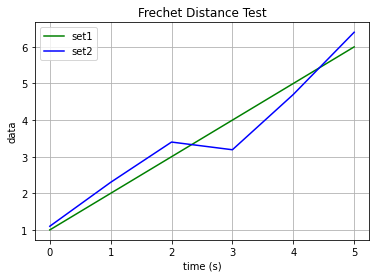

In [10]:
import matplotlib.pyplot as plt

t1 = [0, 1., 2., 3., 4., 5.]
y1 = [  1,   2,   3,   4,   5, 6]
y3 = [1.1, 2.3, 3.4, 3.19, 4.7, 6.4]

t2 = [  0, 0.5,   1, 1.5,   2, 2.5,   3, 3.5,   4, 4.5, 5]
y2 = [1.2, 1.7, 1.9, 2.8, 2.8, 3.4, 4.3, 4.3, 4.8, 5.8, 6.3]

fig0, ah = plt.subplots()
ah.plot(t1, y1,'g',t1,y3,'b')
ah.legend(["set1","set2"])
ah.set(xlabel='time (s)', ylabel='data', title='Frechet Distance Test')
ah.grid()

print(Frechet(t1,y1,t1,y3))

In [11]:
CBAR = 2.0
QB = 5.0
VRW = 10.0
myData = {}
myData["CBAR"] = 2.0
# equation: (CBAR * QB) / (2.0 * VRW)
code = compile("(myData[\"CBAR\"] * QB) / (2.0 * VRW)", "<string>", "eval")
ec = eval(code)
print("ec: ", ec)  # should return 0.5

myData["beta"] = -5
code2 = compile("-10 if myData[\"beta\"] < 0 else 10", "<string>","eval")
ec = eval(code2)
print("ec: ", ec)

ec:  0.5
ec:  -10


In [12]:
import math
ec = eval("math.cos(3.14159)")
print("ec: ", ec)

ec:  -0.9999999999964793


In [13]:
lData = {}
lData["cnp"] = 0
aa = 2
ez = compile("x=4\ny=8\nz=aa*x*y\nlData[\"cnp\"]=z","<function>","exec")
exec(ez)
print("lData[cnp]: ", lData["cnp"])

lData[cnp]:  64


In [14]:
def PopTest(lStack):
    lStack.pop(0)
    lStack.append(12)
    
stack = [0.0, 0.0]

stack.append(1)
stack.append(2)
stack.append(3)

print("stack: ", stack)

stack.pop(0)

print("stack: ", stack)

stack.append(4)

print("stack: ", stack)

PopTest(stack)

print("stack: ", stack)

print("stack 1: ", stack[1])

stack:  [0.0, 0.0, 1, 2, 3]
stack:  [0.0, 1, 2, 3]
stack:  [0.0, 1, 2, 3, 4]
stack:  [1, 2, 3, 4, 12]
stack 1:  2


Testing 4th order Runge-Kutta for 2 simultaneous equations.  Reference is [Numerical Analysis](https://books.google.com/books/about/Numerical_Methods.html?id=6K7KSAAACAAJ).

The two differential equations:  
$ I'_1 = f(t,I_1,I_2) = -4I_1 + 3I_2 + 6, I_1(0) = 0 $  
$ I'_2 = f(t,I_1,I_2) = -2.4I_1 + 1.6I_2 + 3.6, I_2(0) = 0 $  

t   | $I_1$     | $I_2$
----|-----------|---------
0.1 | 0.538255  | 0.3196263
0.2 | 0.9684983 | 0.5687817
0.3 | 1.310717  | 0.7607328
0.4 | 1.581263  | 0.9063208
0.5 | 1.793505  | 1.014402

In [15]:
def I1p(arg):
    return (-4.0*arg[0] + 3.0*arg[1] + 6)

def I2p(arg):
    return (-2.4*arg[0] + 1.6*arg[1] + 3.6)

def RK4(h, Fdot, arg):
    k1 = []
    arg1 = []
    for (a, f) in zip(arg, Fdot):
        k = h*f(arg)
        k1.append(k)
        arg1.append(a + 0.5*k)
        
    k2 = []
    arg2 = []
    for (a, f) in zip(arg, Fdot):
        k = h*f(arg1)
        k2.append(k)
        arg2.append(a + 0.5*k)
    
    k3 = []
    arg3 = []
    for (a, f) in zip(arg, Fdot):
        k = h*f(arg2)
        k3.append(k)
        arg3.append(a + k)
    
    k4 = []
    for f in Fdot:
        k4.append( h*f(arg3))
    
    result = []
    for (a, kc1, kc2, kc3, kc4) in zip(arg, k1, k2, k3, k4):
        result.append(a + (kc1 + 2.0*kc2 + 2.0*kc3 + kc4) / 6.0)
    
    return result

def CheckRK(calculated, actual):
    answer = "pass"
    if abs(calculated - actual) > 1e-4:
        answer = "!! FAILED !!"
        
    return answer

#----- Testing RK4 -------
h = 0.1
Xdot = [I1p, I2p]
arg = [0, 0]
T = [.1, .2, .3, .4, .5]
I1 = [ 0.538255, 0.9684983,  1.310717,  1.581263, 1.793505]
I2 = [0.3196263, 0.5687817, 0.7607328, 0.9063208, 1.014402]
for (t,i1,i2) in zip(T,I1,I2):
    wOut = RK4(h, Xdot, arg)
    print("t: ", t, " w11: ", round(wOut[0],5), CheckRK(wOut[0],i1), 
          " w21: ", round(wOut[1],5), CheckRK(wOut[1],i2) )
    arg = wOut

t:  0.1  w11:  0.53826 pass  w21:  0.31963 pass
t:  0.2  w11:  0.9685 pass  w21:  0.56878 pass
t:  0.3  w11:  1.31072 pass  w21:  0.76073 pass
t:  0.4  w11:  1.58127 pass  w21:  0.90632 pass
t:  0.5  w11:  1.79351 pass  w21:  1.0144 pass


In [16]:
# type \phi then <TAB> key
ϕ = 10.

roll = ϕ * 20
print("ϕ: ", ϕ, "roll: ", roll)

ϕ:  10.0 roll:  200.0


In [17]:
# testing ternary 'a if condition else b'
# value = (a < b) ? true : false;
import math

halfPi = 0.5*math.pi
m13 = 4
x = -halfPi if (m13 > 0.0) else halfPi
print("x: ", x)

m13 = -4
x = -halfPi if (m13 > 0.0) else halfPi
print("x: ", x)

temperature = 30.0
temperature = temperature if (temperature > 0.0) else 0
print("temperature: ", temperature)

temperature = -30.0
temperature = temperature if (temperature > 0.0) else 0
print("temperature: ", temperature)

ALP_UNLIM = 20
ALP_MAX_LIM = 10
y = -2.0 if ALP_UNLIM < -2 else ALP_MAX_LIM if ALP_UNLIM > ALP_MAX_LIM else ALP_UNLIM
print("y: ",y)

x:  -1.5707963267948966
x:  1.5707963267948966
temperature:  30.0
temperature:  0
y:  10


In [18]:
# test doing a list of lists

myVar = []
print(myVar)
myList1 = [1, 2, 3, 4]
myList2 = [5, 6, 7, 8, 9, 10]
myVar.append(myList1)
myVar.append(myList2)
print(myVar)
print(len(myVar))

[]
[[1, 2, 3, 4], [5, 6, 7, 8, 9, 10]]
2


In [19]:
# test if a dictionary can hold an array
myDictTest = {'time': [.1, .2, .3], 'roll_d': [10, 11, 12]}

print("roll_d: ", myDictTest['roll_d'])

pitch = []
pitch.append(20)
pitch.append(30)
pitch.append(40)
myDictTest['pitch_d'] = pitch
print("pitch_d: ", myDictTest['pitch_d'])

header = ['time', 'roll', 'pitch']
data = []
data.append([.1, 10, 20])
data.append([.2, 11, 30])
data.append([.3, 12, 40])
print(data)
myDictTest.clear()
print("myDictTest: ", myDictTest)

myDictTest['time'] = [.1, .2, .3]
myDictTest['roll'] = [10, 11, 12]
myDictTest['pitch'] = [20, 30, 40]
print("myDictTest: ", myDictTest)

labels = ['time', 'roll', 'pitch']
for l in labels:
    myDictTest[l] = []
print("myDictTest: ", myDictTest)


roll_d:  [10, 11, 12]
pitch_d:  [20, 30, 40]
[[0.1, 10, 20], [0.2, 11, 30], [0.3, 12, 40]]
myDictTest:  {}
myDictTest:  {'time': [0.1, 0.2, 0.3], 'roll': [10, 11, 12], 'pitch': [20, 30, 40]}
myDictTest:  {'time': [], 'roll': [], 'pitch': []}


In [20]:
def Angle180Test(angle):
    twoPi = 2*math.pi
    angle = angle / twoPi
    a2Pi = (angle - math.floor(angle)) * twoPi
    if a2Pi > math.pi:
        a2Pi -= twoPi
    return a2Pi
    
print( "30", math.degrees(Angle180Test(math.radians(30))) )
print( "135", math.degrees(Angle180Test(math.radians(135))) )
print( "-90", math.degrees(Angle180Test(math.radians(270))) )
print( "-90", math.degrees(Angle180Test(math.radians(270+360))) )
print( "-90", math.degrees(Angle180Test(math.radians(-90))) )
print( "-90", math.degrees(Angle180Test(math.radians(-90-360))) )
print( "175", math.degrees(Angle180Test(math.radians(-185))) )
#print( Angle180Test(135) )

30 29.999999999999996
135 135.0
-90 -90.0
-90 -90.0
-90 -90.0
-90 -90.0
175 175.0


In [21]:
WGS84_A    = +6.37813700000000000000e+0006 # a
WGS84_INVF = +2.98257223563000000000e+0002 # 1/f
WGS84_F    = +3.35281066474748071998e-0003 # f 

print(WGS84_F)

ded = 10
ded = 2*ded
print(ded)

0.003352810664747481
20


In [22]:
a = [1, 2, 3]
b = a
print(b)

[1, 2, 3]


In [23]:
# test keys in dictionary
td1 = {"a": 1, "b": 2, "c": 3}

if "a" in td1:
    print("a is in td1")
    
if "d" not in td1:
    print("d not in td1")

a is in td1
d not in td1


Create an initial condition (IC) dictionary.  The dictionary value is a list containing the IC value and units.

In [24]:
icTest = \
{
    "trueAirspeed": [23.1, "ft_s"],
    "totalMass": [1, "slug"]
}

print("Vt=", icTest["trueAirspeed"])
print("Vt=", icTest["trueAirspeed"][0])

feetToMeter = 0.3048
slugToKg = 14.593902937
englishToSI = {
    "slug": slugToKg,
    "ft": feetToMeter,
    "ft_s": feetToMeter,
    "nd": 1
}

icData = {}
for key,value in icTest.items():
    units = value[1].lower()
    print("units=", units)
    factor = 1
    if units in englishToSI:
        factor = englishToSI[units]
    v = factor * value[0]
    print("SI=", v)


Vt= [23.1, 'ft_s']
Vt= 23.1
units= ft_s
SI= 7.0408800000000005
units= slug
SI= 14.593902937


In [25]:
sf1 = 5.0
nsf = 1

atd = {
    "tag1": 10.0,
    "tag2": 13
}

input = [
    ["tag1", sf1],
    ["tag2", nsf]
]

for v in input:
    print(atd[v[0]])
    val = atd[v[0]] * v[1]
    print("->",val)
    #print(v[0], ":", atd[v[0]] = atd[v[0]] * v[1]

10.0
-> 50.0
13
-> 13
